In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #Control figure 
import numpy as np
import os
from datetime import date
matplotlib.style.use('ggplot')
%matplotlib inline

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sodapy import Socrata

In [3]:
#MyAppToken = ''

In [4]:
#client = Socrata("data.cityofnewyork.us", MyAppToken)

In [5]:
#results = client.get("dsg6-ifza", limit=2000)

In [6]:
#df = pd.DataFrame.from_records(results)

In [7]:
cwd = os.getcwd() #to get current working directory
#print(cwd)

In [8]:
df = pd.read_csv('DOHMH_Childcare_Center_Inspections.csv', encoding = "L1")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52024 entries, 0 to 52023
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Center Name                                  52024 non-null  object 
 1   Legal Name                                   52024 non-null  object 
 2   Building                                     52013 non-null  object 
 3   Street                                       52024 non-null  object 
 4   Borough                                      52024 non-null  object 
 5   ZipCode                                      51942 non-null  float64
 6   Phone                                        51977 non-null  object 
 7   Permit Number                                46227 non-null  float64
 8   Permit Expiration                            52024 non-null  object 
 9   Status                                       52024 non-null  object 
 10

In [10]:
def clean_string(astr):
    return astr.lower().replace('.', '') \
        .replace(',', '') \
        .replace(';', '') \
        .replace(':', '') \
        .replace('á', 'a') \
        .replace('é', 'e') \
        .replace('í', 'i') \
        .replace('ó', 'o') \
        .replace('ú', 'u') \
        .replace(' ', '_') \
        .replace('ñ', 'ni')

In [11]:
def clean_columns(df):
    for series in df:
        df.rename(columns={series:clean_string(series)}, inplace=True)

In [12]:
def execute(raw_dataset_path, clean_dataset_path):
    print("\t-> Leyendo datos crudos a un DataFrame")
    df = pd.read_csv('DOHMH_Childcare_Center_Inspections.csv')

In [13]:
print("\t-> Limpando columnas")

	-> Limpando columnas


In [14]:
clean_columns(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52024 entries, 0 to 52023
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   center_name                                  52024 non-null  object 
 1   legal_name                                   52024 non-null  object 
 2   building                                     52013 non-null  object 
 3   street                                       52024 non-null  object 
 4   borough                                      52024 non-null  object 
 5   zipcode                                      51942 non-null  float64
 6   phone                                        51977 non-null  object 
 7   permit_number                                46227 non-null  float64
 8   permit_expiration                            52024 non-null  object 
 9   status                                       52024 non-null  object 
 10

In [16]:
print("\t-> Reemplazando espacios en blanco")
for col in df.select_dtypes('object'):
    df[col] = df[col].replace('\s+', ' ', regex=True)

	-> Reemplazando espacios en blanco


In [17]:
print("\t-> Limpiando valores")
for col in df.select_dtypes('object'):
        df[col] = df[col].str.strip()
        df[col] = df[col].str.lower()
        df[col] = df[col].str.replace('á', 'a')
        df[col] = df[col].str.replace('é', 'e')
        df[col] = df[col].str.replace('í', 'i')
        df[col] = df[col].str.replace('ó', 'o')
        df[col] = df[col].str.replace('ú', 'u')
        df[col] = df[col].str.replace(' ', '_')

	-> Limpiando valores


In [18]:
print("\t-> Cambiando NA por np.nan")
for col in df.select_dtypes('object'):
    df.loc[df[col] == 'na', col] = np.nan

	-> Cambiando NA por np.nan


In [19]:
df.to_csv('df.csv', index=False)

In [20]:
print("\t-> Cuántos valores NaN tiene la base")

	-> Cuántos valores NaN tiene la base


In [21]:
df.isnull().sum()

center_name                                        0
legal_name                                         0
building                                          11
street                                             0
borough                                            0
zipcode                                           82
phone                                             47
permit_number                                   5797
permit_expiration                                  0
status                                             0
age_range                                       2316
maximum_capacity                                   0
day_care_id                                        0
program_type                                       0
facility_type                                      0
child_care_type                                    0
building_identification_number                     0
url                                            26395
date_permitted                                

In [22]:
print("\t-> Eliminar duplicados")

	-> Eliminar duplicados


In [23]:
df.duplicated().sum()

12653

In [24]:
df = df.drop_duplicates()
df.shape

(39371, 34)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39371 entries, 0 to 52023
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   center_name                                  39371 non-null  object 
 1   legal_name                                   39371 non-null  object 
 2   building                                     39360 non-null  object 
 3   street                                       39371 non-null  object 
 4   borough                                      39371 non-null  object 
 5   zipcode                                      39321 non-null  float64
 6   phone                                        39325 non-null  object 
 7   permit_number                                35549 non-null  float64
 8   permit_expiration                            39371 non-null  object 
 9   status                                       39371 non-null  object 
 10

### TABLA 3

In [26]:
tabla_3 = df.iloc[:, 0:28] #Seleccionamos sólo las columnas desde center_name hasta avg_critical_violation_rate

In [27]:
tabla_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39371 entries, 0 to 52023
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   center_name                                  39371 non-null  object 
 1   legal_name                                   39371 non-null  object 
 2   building                                     39360 non-null  object 
 3   street                                       39371 non-null  object 
 4   borough                                      39371 non-null  object 
 5   zipcode                                      39321 non-null  float64
 6   phone                                        39325 non-null  object 
 7   permit_number                                35549 non-null  float64
 8   permit_expiration                            39371 non-null  object 
 9   status                                       39371 non-null  object 
 10

In [28]:
tabla_3 = tabla_3.drop_duplicates()
tabla_3.shape

(2989, 28)

3.1 
* Conservar únicamente las variables estáticas que se utilizaron en el modelo: daycareid, borough,maximum_capacity, program_type, facility_type, violation_rate_percent, total_educational_workers, public_health_hazard_violation_rate, critical_violation_rate.

In [29]:
dummies = ["program_type", "facility_type", "borough"]
df_1 = pd.get_dummies(tabla_3[dummies])

In [30]:
tabla_3 = tabla_3.join(df_1)

In [31]:
tabla_3 = tabla_3.drop(['program_type', 'facility_type', 'borough'], axis = 1)

In [32]:
tabla_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 51837
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   center_name                                  2989 non-null   object 
 1   legal_name                                   2989 non-null   object 
 2   building                                     2987 non-null   object 
 3   street                                       2989 non-null   object 
 4   zipcode                                      2983 non-null   float64
 5   phone                                        2984 non-null   object 
 6   permit_number                                2546 non-null   float64
 7   permit_expiration                            2989 non-null   object 
 8   status                                       2989 non-null   object 
 9   age_range                                    2854 non-null   object 
 10 

### TABLA 4

Conservar únicamente las variables que aportaban información sobre las inspecciones de la Tabla 2 (con la excepeción de borough): daycareid, inspection_date, inspection_summary, violation_category y borough.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39371 entries, 0 to 52023
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   center_name                                  39371 non-null  object 
 1   legal_name                                   39371 non-null  object 
 2   building                                     39360 non-null  object 
 3   street                                       39371 non-null  object 
 4   borough                                      39371 non-null  object 
 5   zipcode                                      39321 non-null  float64
 6   phone                                        39325 non-null  object 
 7   permit_number                                35549 non-null  float64
 8   permit_expiration                            39371 non-null  object 
 9   status                                       39371 non-null  object 
 10

In [34]:
tabla_4 = df.iloc[:, [4,12,28,30,33]]

In [35]:
print("\t-> Reagrupar en tres variables Inspection Summary Result: reason, result_1 y result_2")

	-> Reagrupar en tres variables Inspection Summary Result: reason, result_1 y result_2


In [36]:
tabla_4['inspection_summary_result'] = tabla_4['inspection_summary_result'].astype('str')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_3 = pd.DataFrame(tabla_4.inspection_summary_result.str.split('_-_',1).tolist(), columns= ['reason', 'result'])

In [38]:
df_3['result'] = df_3['result'].astype('str')

In [39]:
df_4 = pd.DataFrame(df_3.result.str.split(';_',1).tolist(), columns = ['result_1', 'result_2'])

In [40]:
df_3 = df_3.drop(df_3.columns[[1]], axis=1) 

In [41]:
df_4 = df_4.join(df_3)

In [42]:
tabla_4 = tabla_4.join(df_4)

In [43]:
tabla_4 = tabla_4.drop(['inspection_summary_result'], axis = 1) #Eliminar inspection_summary_result

In [44]:
print("\t-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero")

	-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero


In [45]:
tabla_4.reason.value_counts(dropna=False)

initial_annual_inspection                       19025
NaN                                              9549
compliance_inspection_of_open_violations         5164
monitoring_inspection_non-routine                3957
nan                                              1620
lead_based_paint_or_lead_in_water_inspection       56
Name: reason, dtype: int64

In [46]:
tabla_4['initial_annual_inspection'] = tabla_4.reason.apply(lambda x: 1 if x == "initial_annual_inspection" else 0)

In [47]:
tabla_4.initial_annual_inspection.value_counts(dropna=False)

0    20346
1    19025
Name: initial_annual_inspection, dtype: int64

In [48]:
tabla_4 = tabla_4.drop(['reason'], axis=1) #Eliminamos la variable reason

In [49]:
print("\t-> Creamos dummies a las variables result_1 y result_2")

	-> Creamos dummies a las variables result_1 y result_2


In [50]:
dummies = ["result_1", "result_2"]
df_2 = pd.get_dummies(tabla_4[dummies])

In [51]:
tabla_4 = tabla_4.join(df_2)

In [52]:
tabla_4 = tabla_4.drop(['result_1', 'result_2'], axis = 1) #Eliminamos variables que no necesitamos

In [53]:
print("\t-> Creamos variables de año, mes y día a partir de Inspection date")

	-> Creamos variables de año, mes y día a partir de Inspection date


In [54]:
tabla_4['inspection_date'] = pd.to_datetime(tabla_4.inspection_date, format = '%m/%d/%Y')

In [55]:
tabla_4['inspection_year'] = tabla_4['inspection_date'].dt.year

In [56]:
tabla_4['inspection_month_name'] = tabla_4['inspection_date'].dt.month_name()

In [57]:
tabla_4['inspection_day_name'] = tabla_4['inspection_date'].dt.day_name()

In [58]:
print("\t-> Eliminamos días festivos, sábado y domingo ")

	-> Eliminamos días festivos, sábado y domingo 


In [59]:
tabla_4 = tabla_4.drop(tabla_4.loc[tabla_4['inspection_day_name']== 'Saturday'].index)

In [60]:
tabla_4 = tabla_4.drop(tabla_4.loc[tabla_4['inspection_day_name']== 'Sunday'].index)

In [61]:
print("\t-> Poner como primer columna center_id e inspection_date")

	-> Poner como primer columna center_id e inspection_date


In [62]:
tabla_4.rename(columns={'day_care_id':'center_id'}, inplace=True)

In [63]:
def order(frame,var): 
    varlist =[w for w in frame.columns if w not in var] 
    frame = frame[var+varlist] 
    return frame

In [64]:
tabla_4 = order(tabla_4,['center_id', 'inspection_date'])

In [65]:
print("\t-> Ordenamos la base por year, month y day en forma descendente")

	-> Ordenamos la base por year, month y day en forma descendente


In [66]:
tabla_4.sort_values(['inspection_date'], ascending=[False], inplace=True)

In [67]:
print("\t-> Creamos dummy = 1 si existió violación")

	-> Creamos dummy = 1 si existió violación


In [68]:
tabla_4.violation_category.value_counts(dropna=False)

NaN                     15493
general                 12136
critical                 8338
public_health_hazard     3396
Name: violation_category, dtype: int64

In [69]:
tabla_4['violation'] = tabla_4['violation_category'].apply(lambda x: not pd.isnull(x))

In [70]:
tabla_4['violation'] = tabla_4['violation'].apply(lambda x: 1 if x == True else 0)

In [71]:
tabla_4.violation.value_counts(dropna=False)

1    23870
0    15493
Name: violation, dtype: int64

In [72]:
print("\t-> Creamos dummy = 1 si existió violación y es un problema de salud pública")

	-> Creamos dummy = 1 si existió violación y es un problema de salud pública


In [73]:
tabla_4['public_hazard'] = tabla_4['violation_category'].apply(lambda x: 1 if x == 'public_health_hazard' else 0)

In [74]:
tabla_4.public_hazard.value_counts(dropna=False)

0    35967
1     3396
Name: public_hazard, dtype: int64

In [75]:
print("\t-> Creamos la variable violaciones_hist_salud_publica: Número de violaciones de salud pública históricas (2016-2019) por centro")

	-> Creamos la variable violaciones_hist_salud_publica: Número de violaciones de salud pública históricas (2016-2019) por centro


In [76]:
tabla_4['violaciones_hist_salud_publica'] = tabla_4.public_hazard[(tabla_4.inspection_year != 2020)]

In [77]:
df_4 = tabla_4.groupby('center_id').violaciones_hist_salud_publica.sum().reset_index()

In [78]:
tabla_4 = pd.merge(left=tabla_4,right=df_4, how='left', left_on='center_id', right_on='center_id')

In [79]:
tabla_4 = tabla_4.drop(['violaciones_hist_salud_publica_x'], axis=1) #Eliminamos la variable repetida

In [80]:
tabla_4.rename(columns={'violaciones_hist_salud_publica_y':'violaciones_hist_salud_publica'}, inplace=True)

In [81]:
print("\t-> Creamos la variable violaciones_2019_salud_publica: Número de violaciones de salud pública en el 2019 por centro")

	-> Creamos la variable violaciones_2019_salud_publica: Número de violaciones de salud pública en el 2019 por centro


In [82]:
tabla_4['violaciones_2019_salud_publica'] = tabla_4.public_hazard[(tabla_4.inspection_year == 2019)]

In [83]:
df_5 = tabla_4.groupby('center_id').violaciones_2019_salud_publica.sum().reset_index()

In [84]:
tabla_4 = pd.merge(left=tabla_4,right=df_5, how='left', left_on='center_id', right_on='center_id')

In [85]:
tabla_4 = tabla_4.drop(['violaciones_2019_salud_publica_x'], axis=1) #Eliminamos la variable repetida

In [86]:
tabla_4.rename(columns={'violaciones_2019_salud_publica_y':'violaciones_2019_salud_publica'}, inplace=True)

In [87]:
print("\t-> Creamos la variable violaciones_hist_criticas: Número de violaciones críticas históricas anteriores (2016-2019) por centro")

	-> Creamos la variable violaciones_hist_criticas: Número de violaciones críticas históricas anteriores (2016-2019) por centro


In [88]:
tabla_4['violation_critical'] = tabla_4['violation_category'].apply(lambda x: 1 if x == 'critical' else 0)

In [89]:
tabla_4['violaciones_hist_criticas'] = tabla_4.violation_critical[(tabla_4.inspection_year != 2020)]

In [90]:
df_6 = tabla_4.groupby('center_id').violaciones_hist_criticas.sum().reset_index()

In [91]:
tabla_4 = pd.merge(left=tabla_4,right=df_6, how='left', left_on='center_id', right_on='center_id')

In [92]:
tabla_4 = tabla_4.drop(['violaciones_hist_criticas_x'], axis=1) #Eliminamos la variable repetida

In [93]:
tabla_4.rename(columns={'violaciones_hist_criticas_y':'violaciones_hist_criticas'}, inplace=True)

In [94]:
print("\t-> Creamos la variable violaciones_2019_criticas: Número de violaciones críticas en el 2019 por centro")

	-> Creamos la variable violaciones_2019_criticas: Número de violaciones críticas en el 2019 por centro


In [95]:
tabla_4['violaciones_2019_criticas'] = tabla_4.violation_critical[(tabla_4.inspection_year == 2019)]

In [96]:
df_7 = tabla_4.groupby('center_id').violaciones_2019_criticas.sum().reset_index()

In [97]:
tabla_4 = pd.merge(left=tabla_4,right=df_7, how='left', left_on='center_id', right_on='center_id')

In [98]:
tabla_4 = tabla_4.drop(['violaciones_2019_criticas_x'], axis=1) #Eliminamos la variable repetida

In [99]:
tabla_4.rename(columns={'violaciones_2019_criticas_y':'violaciones_2019_criticas'}, inplace=True)

In [100]:
print("\t-> Creamos la variable ratio_violaciones_hist: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública/ número de inspecciones de primera vez por centro")

	-> Creamos la variable ratio_violaciones_hist: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública/ número de inspecciones de primera vez por centro


In [101]:
df_8 = tabla_4.loc[tabla_4['inspection_year'] != 2020]

In [102]:
df_9 = df_8[df_8.violation_category.isin(['critical', 'public_health_hazard']) & df_8['initial_annual_inspection']==1]

In [103]:
df_10 = df_9.groupby('center_id').initial_annual_inspection.sum().reset_index()

In [104]:
df_11 = tabla_4.groupby('center_id').initial_annual_inspection.sum().reset_index()

In [105]:
df_12 = pd.merge(left=df_11,right=df_10, how='left', left_on='center_id', right_on='center_id')

In [106]:
df_12['ratio_violaciones_hist'] = df_12['initial_annual_inspection_y'] / df_12['initial_annual_inspection_x']

In [107]:
tabla_4 = pd.merge(left=tabla_4,right=df_12, how='left', left_on='center_id', right_on='center_id')

In [108]:
tabla_4 = tabla_4.drop(['initial_annual_inspection_x', 'initial_annual_inspection_y'], axis=1) #Eliminamos variables que no necesitamos 

In [109]:
print("\t-> Creamos la variable ratio_violaciones_2019: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública en el 2019 / número de inspecciones de primera vez por centro")

	-> Creamos la variable ratio_violaciones_2019: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública en el 2019 / número de inspecciones de primera vez por centro


In [110]:
df_13 = tabla_4.loc[tabla_4['inspection_year'] == 2019]

In [111]:
df_14 = df_13[df_13.violation_category.isin(['critical', 'public_health_hazard']) & df_13['initial_annual_inspection']==1]

In [112]:
df_15 = df_14.groupby('center_id').initial_annual_inspection.sum().reset_index()

In [113]:
df_16 = pd.merge(left=df_11,right=df_15, how='left', left_on='center_id', right_on='center_id')

In [114]:
df_16['ratio_violaciones_2019'] = df_16['initial_annual_inspection_y'] / df_16['initial_annual_inspection_x']

In [115]:
tabla_4 = pd.merge(left=tabla_4,right=df_16, how='left', left_on='center_id', right_on='center_id')

In [116]:
tabla_4 = tabla_4.drop(['initial_annual_inspection_x','initial_annual_inspection_y'], axis=1) #Eliminamos variables que no necesitamos 

In [117]:
print("\t-> Creamos la variable prom_violaciones_hist_borough: Promedio de violaciones históricas por distrito")

	-> Creamos la variable prom_violaciones_hist_borough: Promedio de violaciones históricas por distrito


In [118]:
df_17 = tabla_4.loc[tabla_4['inspection_year'] != 2020]

In [119]:
df_18 = df_17.groupby('borough').violation.mean().reset_index()

In [120]:
tabla_4 = pd.merge(left=tabla_4,right=df_18, how='left', left_on='borough', right_on='borough')

In [121]:
tabla_4.rename(columns={'violation_y':'prom_violaciones_hist_borough'}, inplace=True)

In [122]:
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)

In [123]:
print("\t-> Creamos la variable prom_violaciones_2019_borough: Promedio de violaciones en el 2019 por distrito")

	-> Creamos la variable prom_violaciones_2019_borough: Promedio de violaciones en el 2019 por distrito


In [124]:
df_19 = tabla_4.loc[tabla_4['inspection_year'] == 2019]

In [125]:
df_20 = df_19.groupby('borough').violation.mean().reset_index()

In [126]:
tabla_4 = pd.merge(left=tabla_4,right=df_20, how='left', left_on='borough', right_on='borough')

In [127]:
tabla_4.rename(columns={'violation_y':'prom_violaciones_2019_borough'}, inplace=True)

In [128]:
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)

In [129]:
print("\t-> Creamos la variable ratio_violaciones_hist_sp: Número de violaciones de salud pública de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019) ")

	-> Creamos la variable ratio_violaciones_hist_sp: Número de violaciones de salud pública de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019) 


In [130]:
df_21 = tabla_4.loc[tabla_4['inspection_year'] != 2020]

In [131]:
df_22 = df_21.loc[df_21['initial_annual_inspection'] == 1]

In [132]:
df_23 = df_22.groupby('center_id').public_hazard.sum().reset_index()

In [133]:
df_24 = df_22.groupby('center_id').violation.sum().reset_index()

In [134]:
df_25 = pd.merge(left=df_23,right=df_24, how='left', left_on='center_id', right_on='center_id')

In [135]:
df_25['ratio_violaciones_hist_sp'] = df_25['public_hazard'] / df_25['violation']

In [136]:
tabla_4 = pd.merge(left=tabla_4,right=df_25, how='left', left_on='center_id', right_on='center_id')

In [137]:
tabla_4 = tabla_4.drop(['public_hazard_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [138]:
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)

In [139]:
tabla_4.rename(columns={'public_hazard_x':'public_hazard'}, inplace=True)

In [140]:
print("\t-> Creamos la variable ratio_violaciones_2019_sp: Número de violaciones de salud pública de primera vez por centro en el 2019 / número de violaciones de primera vez de todo tipo por centro en el 2019 ")

	-> Creamos la variable ratio_violaciones_2019_sp: Número de violaciones de salud pública de primera vez por centro en el 2019 / número de violaciones de primera vez de todo tipo por centro en el 2019 


In [141]:
df_26 = tabla_4.loc[tabla_4['inspection_year'] == 2019]

In [142]:
df_27 = df_26.loc[df_26['initial_annual_inspection'] == 1]

In [143]:
df_28 = df_27.groupby('center_id').public_hazard.sum().reset_index()

In [144]:
df_29 = df_27.groupby('center_id').violation.sum().reset_index()

In [145]:
df_30 = pd.merge(left=df_28,right=df_29, how='left', left_on='center_id', right_on='center_id')

In [146]:
df_30['ratio_violaciones_2019_sp'] = df_30['public_hazard'] / df_30['violation']

In [147]:
tabla_4 = pd.merge(left=tabla_4,right=df_30, how='left', left_on='center_id', right_on='center_id')

In [148]:
tabla_4 = tabla_4.drop(['public_hazard_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [149]:
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)

In [150]:
tabla_4.rename(columns={'public_hazard_x':'public_hazard'}, inplace=True)

In [151]:
print("\t-> Creamos la variable ratio_violaciones_hist_criticas: Número de violaciones críticas de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019)")

	-> Creamos la variable ratio_violaciones_hist_criticas: Número de violaciones críticas de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019)


In [152]:
df_31 = tabla_4.loc[tabla_4['inspection_year'] != 2020]

In [153]:
df_32 = df_31.loc[df_31['initial_annual_inspection'] == 1]

In [154]:
df_33 = df_32.groupby('center_id').violation_critical.sum().reset_index()

In [155]:
df_34 = df_32.groupby('center_id').violation.sum().reset_index()

In [156]:
df_35 = pd.merge(left=df_33,right=df_34, how='left', left_on='center_id', right_on='center_id')

In [157]:
df_35['ratio_violaciones_hist_criticas'] = df_35['violation_critical'] / df_35['violation']

In [158]:
tabla_4 = pd.merge(left=tabla_4,right=df_35, how='left', left_on='center_id', right_on='center_id')

In [159]:
tabla_4 = tabla_4.drop(['violation_critical_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [160]:
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)

In [161]:
tabla_4.rename(columns={'violation_critical_x':'violation_critical'}, inplace=True)

In [162]:
print("\t-> Creamos la variable ratio_violaciones_2019_criticas: Número de violaciones críticas de primera vez por centro en el 2019/ número de violaciones de primera vez de todo tipo por centro en el 2019")

	-> Creamos la variable ratio_violaciones_2019_criticas: Número de violaciones críticas de primera vez por centro en el 2019/ número de violaciones de primera vez de todo tipo por centro en el 2019


In [163]:
df_36 = tabla_4.loc[tabla_4['inspection_year'] == 2019]

In [164]:
df_37 = df_36.loc[df_36['initial_annual_inspection'] == 1]

In [165]:
df_38 = df_37.groupby('center_id').violation_critical.sum().reset_index()

In [166]:
df_39 = df_37.groupby('center_id').violation.sum().reset_index()

In [167]:
df_40 = pd.merge(left=df_38,right=df_39, how='left', left_on='center_id', right_on='center_id')

In [168]:
df_40['ratio_violaciones_2019_criticas'] = df_40['violation_critical'] / df_40['violation']

In [169]:
tabla_4 = pd.merge(left=tabla_4,right=df_40, how='left', left_on='center_id', right_on='center_id')

In [170]:
tabla_4 = tabla_4.drop(['violation_critical_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [171]:
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)

In [172]:
tabla_4.rename(columns={'violation_critical_x':'violation_critical'}, inplace=True)

In [173]:
tabla_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39363 entries, 0 to 39362
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   center_id                                            39363 non-null  object        
 1   inspection_date                                      39307 non-null  datetime64[ns]
 2   borough                                              39363 non-null  object        
 3   violation_category                                   23870 non-null  object        
 4   initial_annual_inspection                            39363 non-null  int64         
 5   result_1_None                                        39363 non-null  uint8         
 6   result_1_passed_inspection                           39363 non-null  uint8         
 7   result_1_passed_inspection_with_no_violations        39363 non-null  uint8         
 

In [174]:
tabla_5 = tabla_4.join(tabla_3, lsuffix='_caller', rsuffix='_other')

In [175]:
tabla_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39363 entries, 0 to 39362
Data columns (total 71 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   center_id                                            39363 non-null  object        
 1   inspection_date                                      39307 non-null  datetime64[ns]
 2   borough                                              39363 non-null  object        
 3   violation_category                                   23870 non-null  object        
 4   initial_annual_inspection                            39363 non-null  int64         
 5   result_1_None                                        39363 non-null  uint8         
 6   result_1_passed_inspection                           39363 non-null  uint8         
 7   result_1_passed_inspection_with_no_violations        39363 non-null  uint8         
 

In [176]:
tabla_5 = tabla_5.set_index(['center_id', 'inspection_date'])

In [177]:
tabla_5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39363 entries, ('dc11190', Timestamp('2020-04-09 00:00:00')) to ('dc38414', nan)
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   borough                                              39363 non-null  object 
 1   violation_category                                   23870 non-null  object 
 2   initial_annual_inspection                            39363 non-null  int64  
 3   result_1_None                                        39363 non-null  uint8  
 4   result_1_passed_inspection                           39363 non-null  uint8  
 5   result_1_passed_inspection_with_no_violations        39363 non-null  uint8  
 6   result_1_previously_cited_violations_corrected       39363 non-null  uint8  
 7   result_1_previously_closed_program_re-opened         39363 non-null  uint8  
 8   result_1_re

In [178]:
tabla_5 = tabla_5.drop(tabla_5.columns[[0,1,14,15,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,49,51,53,55]], axis=1) #Eliminamos variables que no necesitamos 

In [179]:
tabla_5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39363 entries, ('dc11190', Timestamp('2020-04-09 00:00:00')) to ('dc38414', nan)
Data columns (total 45 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   initial_annual_inspection                            39363 non-null  int64  
 1   result_1_None                                        39363 non-null  uint8  
 2   result_1_passed_inspection                           39363 non-null  uint8  
 3   result_1_passed_inspection_with_no_violations        39363 non-null  uint8  
 4   result_1_previously_cited_violations_corrected       39363 non-null  uint8  
 5   result_1_previously_closed_program_re-opened         39363 non-null  uint8  
 6   result_1_reinspection_not_required                   39363 non-null  uint8  
 7   result_1_reinspection_required                       39363 non-null  uint8  
 8   result_2_fi

In [180]:
tabla_5 = tabla_5.fillna(0)

Modelo Random Forest

- Para el entrenamiento se usaron todos los datos del 2017-2019 y para validación los datos correspondientes a lo que va del año 2020.

- Mediante una gráfica de barras se verifica si la muestra esta balanceada o no y se observa que no está balanceada.

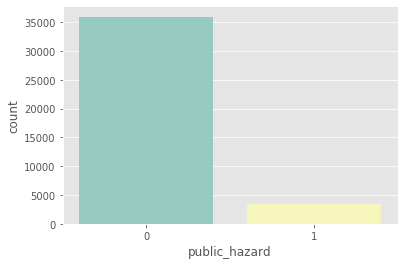

In [181]:
sns.countplot(x='public_hazard', data=tabla_5, palette="Set3")

- Así que se utiliza _over-sampling_ para balancear la muestra.

In [182]:
count_class_0, count_class_1 = tabla_5.public_hazard.value_counts()

In [183]:
df_class_0 = tabla_5[tabla_5['public_hazard'] == 0]
df_class_1 = tabla_5[tabla_5['public_hazard'] == 1]

In [184]:
count_class_0

35967

In [185]:
count_class_1

3396

In [186]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

Random over-sampling:
1    3396
0    3396
Name: public_hazard, dtype: int64


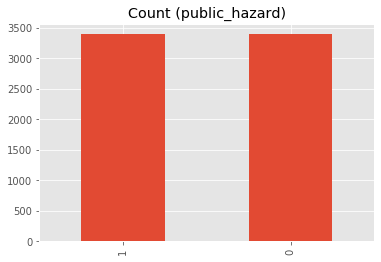

In [187]:
print('Random over-sampling:')
print(df_test_over.public_hazard.value_counts())

df_test_over.public_hazard.value_counts().plot(kind='bar', title='Count (public_hazard)');

In [188]:
df_train = df_test_over.loc[df_test_over['inspection_year'] != 2020] 

In [189]:
df_test = df_test_over.loc[df_test_over['inspection_year'] == 2020]

In [190]:
Y_train = df_train[['public_hazard']]

In [191]:
Y_test = df_test[['public_hazard']]

In [192]:
X_train = df_train[[i for i in df_train.keys() if i not in Y_train]]

In [193]:
X_test = df_test[[i for i in df_test.keys() if i not in Y_test]]

In [194]:
import sklearn as sk
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [195]:
np.random.seed(0)
rforest = RandomForestClassifier(n_estimators=600, class_weight="balanced", max_depth=8, criterion='gini')
rforest.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [196]:
Y_pred = rforest.predict(X_test)

In [197]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, average='macro'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.722495894909688
Precision: 0.7410805626598465
Recall: 0.7052531301034295


In [199]:
rforest_matrix=metrics.confusion_matrix(Y_test,Y_pred)

In [200]:
pd.DataFrame(rforest_matrix)

,0,1
0,295,39
1,130,145


Text(0.5, 257.44, 'Predicted label')

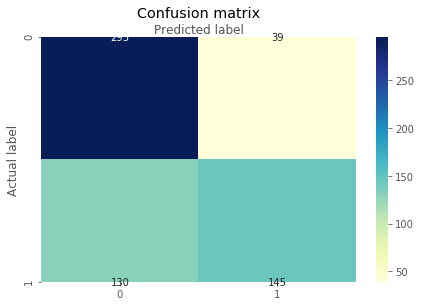

In [201]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(rforest_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [202]:
feature_importance_frame = pd.DataFrame()
feature_importance_frame['features'] = list(X_train.keys())
feature_importance_frame['importance'] = list(rforest.feature_importances_)
feature_importance_frame = feature_importance_frame.sort_values(
        'importance', ascending=False)
feature_importance_frame

,features,importance
12,violation,0.308278
13,violaciones_hist_salud_publica,0.204971
15,violation_critical,0.194342
22,ratio_violaciones_hist_sp,0.081562
14,violaciones_2019_salud_publica,0.033313
11,inspection_year,0.032890
18,ratio_violaciones_hist,0.032385
0,initial_annual_inspection,0.024578
23,ratio_violaciones_2019_sp,0.015218
16,violaciones_hist_criticas,0.011818


Modelo XGBoost

In [203]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import make_classification
import multiprocessing

In [204]:
xg_clas = xgb.XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.01, subsample=1, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=multiprocessing.cpu_count())

In [205]:
xg_clas.fit(X_train, Y_train)

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=1, nthread=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [206]:
Y_p = xg_clas.predict(X_test)

In [209]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_p)

In [210]:
pd.DataFrame(cnf_matrix)

,0,1
0,278,56
1,98,177


Text(0.5, 257.44, 'Predicted label')

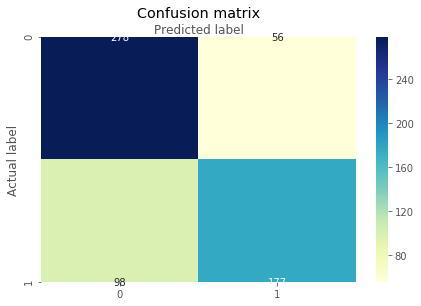

In [211]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [212]:
feature_importance_frame = pd.DataFrame()
feature_importance_frame['features'] = list(X_train.keys())
feature_importance_frame['importance'] = list(xg_clas.feature_importances_)
feature_importance_frame = feature_importance_frame.sort_values(
        'importance', ascending=False)
feature_importance_frame

,features,importance
12,violation,0.355217
15,violation_critical,0.276857
13,violaciones_hist_salud_publica,0.146747
0,initial_annual_inspection,0.046236
22,ratio_violaciones_hist_sp,0.036395
11,inspection_year,0.021854
18,ratio_violaciones_hist,0.020687
23,ratio_violaciones_2019_sp,0.014056
19,ratio_violaciones_2019,0.013865
14,violaciones_2019_salud_publica,0.013388
